In [1]:
import pandas as pd
import os

file_path = r"C:\Users\pc\Documents\bhc project\lifestyle\Physical Activity.xpt"
print(f" INSPECTING FILE: {file_path}")

try:

    df_raw = pd.read_sas(file_path)
    
    print("\n LIST OF ALL COLUMNS:")
    print(df_raw.columns.tolist())
    
    print("\n FIRST 5 ROWS OF DATA (Look for 'minutes'):")
    display(df_raw.head().T)

except Exception as e:
    print(f"Error: {e}")

 INSPECTING FILE: C:\Users\pc\Documents\bhc project\lifestyle\Physical Activity.xpt

 LIST OF ALL COLUMNS:
['SEQN', 'PAD790Q', 'PAD790U', 'PAD800', 'PAD810Q', 'PAD810U', 'PAD820', 'PAD680']

 FIRST 5 ROWS OF DATA (Look for 'minutes'):


,0,1,2,3,4
SEQN,130378.0,130379.0,130380.0,130384.0,130385.0
PAD790Q,3.0,4.0,1.0,0.0,1.0
PAD790U,b'W',b'W',b'W',b'',b'D'
PAD800,45.0,45.0,20.0,NaN,90.0
PAD810Q,3.0,3.0,0.0,0.0,1.0
PAD810U,b'W',b'W',b'',b'',b'W'
PAD820,45.0,45.0,NaN,NaN,60.0
PAD680,360.0,480.0,240.0,60.0,180.0


In [4]:
import pandas as pd
import numpy as np
import os

base_path = r"C:\Users\pc\Documents\bhc project\lifestyle"

print("--- 🧹 PHASE 1 : Cleaning Lifestyle ---")

path_pa = os.path.join(base_path, "Physical Activity.xpt")
df_pa = pd.read_sas(path_pa)

df_pa_clean = df_pa[['SEQN', 'PAD680']].rename(columns={'PAD680': 'Sedentary_Minutes'})

df_pa_clean.loc[df_pa_clean['Sedentary_Minutes'] >= 7777, 'Sedentary_Minutes'] = np.nan

print(f" Activity : {len(df_pa_clean)} patients")




--- 🧹 PHASE 1 : Cleaning Lifestyle ---
 Activity : 8153 patients


In [5]:
path_sleep = os.path.join(base_path, "Sleeping -SLQ_L.xpt")
df_sleep = pd.read_sas(path_sleep)

df_sleep_clean = df_sleep[['SEQN', 'SLD012']].rename(columns={'SLD012': 'Sleep_Hours'})

df_sleep_clean.loc[df_sleep_clean['Sleep_Hours'] > 24, 'Sleep_Hours'] = np.nan

print(f" sleeping : {len(df_sleep_clean)} patients")


 sleeping : 8501 patients


In [6]:
path_smoke = os.path.join(base_path, "Smoking.xpt")
df_smoke = pd.read_sas(path_smoke)

df_smoke_clean = df_smoke[['SEQN', 'SMQ020']].rename(columns={'SMQ020': 'Smoker_History'})

df_smoke_clean.loc[~df_smoke_clean['Smoker_History'].isin([1, 2]), 'Smoker_History'] = np.nan

print(f" Smoking : {len(df_smoke_clean)} patients")


 Smoking : 9015 patients


In [7]:
df_lifestyle = pd.merge(df_pa_clean, df_sleep_clean, on='SEQN', how='outer')
df_lifestyle = pd.merge(df_lifestyle, df_smoke_clean, on='SEQN', how='outer')

print("\n Lifestyle cleaned ")
print(f"Dimensions finales : {df_lifestyle.shape}")
display(df_lifestyle.head())


 Lifestyle cleaned 
Dimensions finales : (9085, 4)


,SEQN,Sedentary_Minutes,Sleep_Hours,Smoker_History
0,130378.0,360.0,9.5,1.0
1,130379.0,480.0,9.0,1.0
2,130380.0,240.0,8.0,2.0
3,130384.0,60.0,7.5,2.0
4,130385.0,180.0,8.0,2.0


In [8]:
folder_path = r"C:\Users\pc\Documents\bhc project\Nutrition"

print(f" CONTENTS OF FOLDER: {folder_path}\n")

try:

    files_found = os.listdir(folder_path)
    
    for file in files_found:
        print(f"    {file}")

except Exception as e:
    print(f" Error accessing folder: {e}")

 CONTENTS OF FOLDER: C:\Users\pc\Documents\bhc project\Nutrition

    ALQ_L.xpt
    DR1TOT_L sugar.xpt


In [9]:
base_path = r"C:\Users\pc\Documents\bhc project\Nutrition"

print("---  STEP 1: INSPECTING YOUR DATASETS ---")

file_nut = os.path.join(base_path, "DR1TOT_L sugar.xpt")

try:
    df_nut = pd.read_sas(file_nut)
    print(f"\n FILE: DR1TOT_L sugar.xpt")
    print(f"   -> Columns found: {len(df_nut.columns)}")
    
    print("\n    Column Names (First 50):")
    print(df_nut.columns.tolist()[:50])
    
    print("\n    DATA PREVIEW:")
    display(df_nut.head())

except Exception as e:
    print(f" Error reading Nutrition file: {e}")


file_alc = os.path.join(base_path, "ALQ_L.xpt")

try:
    df_alc = pd.read_sas(file_alc)
    print(f"\n FILE: ALQ_L.xpt")
    print(f"   -> Columns found: {len(df_alc.columns)}")
    
    print("\n    All Column Names:")
    print(df_alc.columns.tolist())
    
    print("\n    DATA PREVIEW:")
    display(df_alc.head())

except Exception as e:
    print(f" Error reading Alcohol file: {e}")

---  STEP 1: INSPECTING YOUR DATASETS ---

 FILE: DR1TOT_L sugar.xpt
   -> Columns found: 168

    Column Names (First 50):
['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO']

    DATA PREVIEW:


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,130378.0,61366.555827,70554.222162,1.0,73.0,2.0,2.0,40.0,4.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,130379.0,34638.056480,36505.468348,1.0,73.0,2.0,2.0,19.0,4.0,1.0,...,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,130380.0,84728.261560,103979.190677,1.0,73.0,2.0,2.0,16.0,4.0,1.0,...,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
3,130381.0,61737.133446,75009.220819,1.0,91.0,2.0,2.0,23.0,5.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,130382.0,75846.746917,172361.851828,1.0,73.0,2.0,2.0,27.0,6.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0



 FILE: ALQ_L.xpt
   -> Columns found: 9

    All Column Names:
['SEQN', 'ALQ111', 'ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ151', 'ALQ170']

    DATA PREVIEW:


,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,ALQ170
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,1.0,2.000000e+00,3.0,5.397605e-79,NaN,NaN,2.0,NaN
2,130380.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,2.0,NaN
3,130386.0,1.0,4.000000e+00,2.0,1.000000e+01,5.397605e-79,10.0,2.0,5.397605e-79
4,130387.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN


In [10]:
base_path = r"C:\Users\pc\Documents\bhc project\Nutrition"

print("---  PHASE 2: NUTRITION DATA ENGINEERING ---")

path_nut = os.path.join(base_path, "DR1TOT_L sugar.xpt")
df_nut = pd.read_sas(path_nut)

df_diet = df_nut[['SEQN', 'DR1TSUGR', 'DR1TFIBE']].rename(columns={
    'DR1TSUGR': 'Sugar_Gm',
    'DR1TFIBE': 'Fiber_Gm'
})

print(f" Diet Data loaded: {len(df_diet)} rows.")


path_alc = os.path.join(base_path, "ALQ_L.xpt")
df_alc = pd.read_sas(path_alc)

df_alcohol_clean = df_alc[['SEQN', 'ALQ130']].rename(columns={'ALQ130': 'Alcohol_Drinks'})

df_alcohol_clean.loc[df_alcohol_clean['Alcohol_Drinks'] >= 777, 'Alcohol_Drinks'] = np.nan
df_alcohol_clean.loc[df_alcohol_clean['Alcohol_Drinks'] < 0.001, 'Alcohol_Drinks'] = 0

print(f" Alcohol Data loaded: {len(df_alcohol_clean)} rows.")



---  PHASE 2: NUTRITION DATA ENGINEERING ---
 Diet Data loaded: 8860 rows.
 Alcohol Data loaded: 6337 rows.


In [11]:
df_nutrition = pd.merge(df_diet, df_alcohol_clean, on='SEQN', how='outer')

print("\n NUTRITION MODULE COMPLETE")
print(f"Total Shape: {df_nutrition.shape}")
display(df_nutrition.head())


 NUTRITION MODULE COMPLETE
Total Shape: (8860, 4)


,SEQN,Sugar_Gm,Fiber_Gm,Alcohol_Drinks
0,130378.0,43.71,10.1,NaN
1,130379.0,113.58,29.6,3.0
2,130380.0,114.66,21.1,1.0
3,130381.0,117.83,11.5,NaN
4,130382.0,112.99,13.8,NaN


In [13]:
import os

folder_path = r"C:\Users\pc\Documents\bhc project\Omics"

print(f" CONTENTS OF FOLDER: {folder_path}\n")

try:
    # List everything in the directory
    files_found = os.listdir(folder_path)
    
    for file in files_found:
        print(f"    {file}")

except Exception as e:
    print(f" Error accessing folder: {e}")
    print("   (Please check if the folder is named 'Omics' or 'omics')")

 CONTENTS OF FOLDER: C:\Users\pc\Documents\bhc project\Omics

    Blood pressure and cholesterol.xpt
    BMX_L (1) (body measure).xpt
    GHB_L (hb1ac.xpt
    VID_L.xpt


In [14]:
import pandas as pd
import os

base_path = r"C:\Users\pc\Documents\bhc project\Omics"

print("---  STEP 1: INSPECTING OMICS DATASETS ---")

file_bmi = os.path.join(base_path, "BMX_L (1) (body measure).xpt")

try:
    df_bmi = pd.read_sas(file_bmi)
    print(f"\n FILE: {file_bmi}")
    print(f"   -> Columns found: {len(df_bmi.columns)}")
    # BMI is usually 'BMXBMI', let's print columns starting with 'BMX'
    print(f"   -> Columns: {[c for c in df_bmi.columns if 'BMX' in c]}")
    
except Exception as e:
    print(f" Error reading BMI file: {e}")

file_ghb = os.path.join(base_path, "GHB_L (hb1ac.xpt") # Using your exact filename

try:
    df_ghb = pd.read_sas(file_ghb)
    print(f"\n FILE: {file_ghb}")
    print(f"   -> Columns found: {len(df_ghb.columns)}")
    print(f"   -> Columns: {df_ghb.columns.tolist()}")
    
except Exception as e:
    print(f" Error reading HbA1c file: {e}")

file_bp = os.path.join(base_path, "Blood pressure and cholesterol.xpt")

try:
    df_bp = pd.read_sas(file_bp)
    print(f"\n FILE: {file_bp}")
    print(f"   -> Columns found: {len(df_bp.columns)}")
    # We look for questions (BPQ...)
    print(f"   -> Columns: {[c for c in df_bp.columns if 'BPQ' in c]}")
    
except Exception as e:
    print(f" Error reading BP file: {e}")

file_vid = os.path.join(base_path, "VID_L.xpt")

try:
    df_vid = pd.read_sas(file_vid)
    print(f"\n FILE: {file_vid}")
    print(f"   -> Columns found: {len(df_vid.columns)}")
    print(f"   -> Columns: {df_vid.columns.tolist()}")
    
except Exception as e:
    print(f" Error reading Vitamin D file: {e}")

---  STEP 1: INSPECTING OMICS DATASETS ---

 FILE: C:\Users\pc\Documents\bhc project\Omics\BMX_L (1) (body measure).xpt
   -> Columns found: 22
   -> Columns: ['BMXWT', 'BMXRECUM', 'BMXHEAD', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BMXHIP']

 FILE: C:\Users\pc\Documents\bhc project\Omics\GHB_L (hb1ac.xpt
   -> Columns found: 3
   -> Columns: ['SEQN', 'WTPH2YR', 'LBXGH']

 FILE: C:\Users\pc\Documents\bhc project\Omics\Blood pressure and cholesterol.xpt
   -> Columns found: 6
   -> Columns: ['BPQ020', 'BPQ030', 'BPQ150', 'BPQ080', 'BPQ101D']

 FILE: C:\Users\pc\Documents\bhc project\Omics\VID_L.xpt
   -> Columns found: 10
   -> Columns: ['SEQN', 'WTPH2YR', 'LBXVIDMS', 'LBDVIDLC', 'LBXVD2MS', 'LBDVD2LC', 'LBXVD3MS', 'LBDVD3LC', 'LBXVE3MS', 'LBDVE3LC']


In [15]:
import pandas as pd
import numpy as np
import os

base_path = r"C:\Users\pc\Documents\bhc project\Omics"

print("---  PHASE 3: OMICS DATA ENGINEERING ---")

path_bmi = os.path.join(base_path, "BMX_L (1) (body measure).xpt")
df_bmi = pd.read_sas(path_bmi)

df_bmi_clean = df_bmi[['SEQN', 'BMXBMI']].rename(columns={'BMXBMI': 'BMI'})

print(f" BMI loaded: {len(df_bmi_clean)} rows.")

path_ghb = os.path.join(base_path, "GHB_L (hb1ac.xpt")
df_ghb = pd.read_sas(path_ghb)

df_ghb_clean = df_ghb[['SEQN', 'LBXGH']].rename(columns={'LBXGH': 'HbA1c'})

print(f" HbA1c loaded: {len(df_ghb_clean)} rows.")

path_bp = os.path.join(base_path, "Blood pressure and cholesterol.xpt")
df_bp = pd.read_sas(path_bp)

df_bp_clean = df_bp[['SEQN', 'BPQ020']].rename(columns={'BPQ020': 'Hypertension'})

df_bp_clean['Hypertension'] = df_bp_clean['Hypertension'].replace({1: 1, 2: 0})

df_bp_clean.loc[~df_bp_clean['Hypertension'].isin([0, 1]), 'Hypertension'] = np.nan

print(f" Hypertension loaded: {len(df_bp_clean)} rows.")

path_vid = os.path.join(base_path, "VID_L.xpt")
df_vid = pd.read_sas(path_vid)

df_vid_clean = df_vid[['SEQN', 'LBXVIDMS']].rename(columns={'LBXVIDMS': 'VitaminD_nmol'})

print(f" Vitamin D loaded: {len(df_vid_clean)} rows.")

df_omics = pd.merge(df_bmi_clean, df_ghb_clean, on='SEQN', how='outer')
df_omics = pd.merge(df_omics, df_bp_clean, on='SEQN', how='outer')
df_omics = pd.merge(df_omics, df_vid_clean, on='SEQN', how='outer')

print("\n OMICS MODULE COMPLETE")
print(f"Total Shape: {df_omics.shape}")
display(df_omics.head())

---  PHASE 3: OMICS DATA ENGINEERING ---
 BMI loaded: 8860 rows.
 HbA1c loaded: 7199 rows.
 Hypertension loaded: 8501 rows.
 Vitamin D loaded: 8727 rows.

 OMICS MODULE COMPLETE
Total Shape: (10746, 5)


,SEQN,BMI,HbA1c,Hypertension,VitaminD_nmol
0,130378.0,27.0,5.6,1.0,58.9
1,130379.0,33.5,5.6,1.0,60.5
2,130380.0,29.7,6.2,0.0,39.4
3,130381.0,23.8,NaN,NaN,NaN
4,130382.0,NaN,NaN,NaN,NaN


In [18]:
import pandas as pd
import os
base_path = r"C:\Users\pc\Documents\bhc project"
file_path = os.path.join(base_path, "DEMO_L.xpt")

print(f" INSPECTING: {file_path}")

try:
    df_demo = pd.read_sas(file_path)
    
    print(f"\n ALL COLUMNS found ({len(df_demo.columns)}):")
    print(df_demo.columns.tolist())
    
    print("\n DATA PREVIEW (First 5 rows):")
    display(df_demo.head())

except Exception as e:
    print(f" Error: {e}")

 INSPECTING: C:\Users\pc\Documents\bhc project\DEMO_L.xpt

 ALL COLUMNS found (27):
['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR']

 DATA PREVIEW (First 5 rows):


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [19]:
import pandas as pd
import os

base_path = r"C:\Users\pc\Documents\bhc project" 
print("---  PHASE 4: DEMOGRAPHICS & FILTERING ---")

file_demo = os.path.join(base_path, "DEMO_L.xpt")
df_demo = pd.read_sas(file_demo)

df_demo_clean = df_demo[['SEQN', 'RIDAGEYR', 'RIAGENDR']].rename(columns={
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender'
})

print(f"   -> Total Participants Loaded: {len(df_demo_clean)}")


df_adults = df_demo_clean[df_demo_clean['Age'] >= 20].copy()

print(f"   -> Adults Retained (Age 20+): {len(df_adults)}")
print(f"   -> Children Excluded: {len(df_demo_clean) - len(df_adults)}")

print("\n DEMOGRAPHICS MODULE COMPLETE")
display(df_adults.head())

---  PHASE 4: DEMOGRAPHICS & FILTERING ---
   -> Total Participants Loaded: 11933
   -> Adults Retained (Age 20+): 7809
   -> Children Excluded: 4124

 DEMOGRAPHICS MODULE COMPLETE


,SEQN,Age,Gender
0,130378.0,43.0,1.0
1,130379.0,66.0,1.0
2,130380.0,44.0,2.0
6,130384.0,43.0,1.0
7,130385.0,65.0,2.0


In [20]:
print("---  PHASE 5: DATA INTEGRATION (MERGE) ---")

df_final = df_adults.copy()


df_final = pd.merge(df_final, df_lifestyle, on='SEQN', how='left')

df_final = pd.merge(df_final, df_nutrition, on='SEQN', how='left')

df_final = pd.merge(df_final, df_omics, on='SEQN', how='left')

print(f" MASTER DATASET CREATED.")
print(f"   -> Final Dimensions: {df_final.shape}")
print(f"   -> Columns: {df_final.columns.tolist()}")

display(df_final.head())

---  PHASE 5: DATA INTEGRATION (MERGE) ---
 MASTER DATASET CREATED.
   -> Final Dimensions: (7809, 13)
   -> Columns: ['SEQN', 'Age', 'Gender', 'Sedentary_Minutes', 'Sleep_Hours', 'Smoker_History', 'Sugar_Gm', 'Fiber_Gm', 'Alcohol_Drinks', 'BMI', 'HbA1c', 'Hypertension', 'VitaminD_nmol']


,SEQN,Age,Gender,Sedentary_Minutes,Sleep_Hours,Smoker_History,Sugar_Gm,Fiber_Gm,Alcohol_Drinks,BMI,HbA1c,Hypertension,VitaminD_nmol
0,130378.0,43.0,1.0,360.0,9.5,1.0,43.71,10.1,NaN,27.0,5.6,1.0,58.9
1,130379.0,66.0,1.0,480.0,9.0,1.0,113.58,29.6,3.0,33.5,5.6,1.0,60.5
2,130380.0,44.0,2.0,240.0,8.0,2.0,114.66,21.1,1.0,29.7,6.2,0.0,39.4
3,130384.0,43.0,1.0,60.0,7.5,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,130385.0,65.0,2.0,180.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [21]:
from sklearn.preprocessing import MinMaxScaler

print("---  PHASE 6: BHC SCORING ALGORITHM ---")

df_scored = df_final.copy()

negative_cols = ['Sedentary_Minutes', 'Sugar_Gm', 'Alcohol_Drinks', 'BMI', 'HbA1c']

positive_cols = ['Fiber_Gm', 'VitaminD_nmol', 'Sleep_Hours'] 

scaler = MinMaxScaler(feature_range=(0, 100))

for col in negative_cols:
    new_col = f"Score_{col}"
    
    scaled_values = scaler.fit_transform(df_scored[[col]])
    
    df_scored[new_col] = 100 - scaled_values

for col in positive_cols:
    new_col = f"Score_{col}"
    df_scored[new_col] = scaler.fit_transform(df_scored[[col]])

df_scored['Score_Smoker'] = df_scored['Smoker_History'].replace({1: 0, 2: 100}) 

df_scored['Score_Hypertension'] = df_scored['Hypertension'].replace({1: 0, 0: 100})

score_columns = [c for c in df_scored.columns if c.startswith('Score_')]

df_scored['BHC_Score'] = df_scored[score_columns].mean(axis=1)

print(" SCORE CALCULÉ AVEC SUCCÈS.")
print(f"   -> Moyenne de la population : {df_scored['BHC_Score'].mean():.2f} / 100")

display(df_scored[['SEQN', 'Age', 'BHC_Score'] + score_columns].head())

---  PHASE 6: BHC SCORING ALGORITHM ---
 SCORE CALCULÉ AVEC SUCCÈS.
   -> Moyenne de la population : 60.06 / 100


,SEQN,Age,BHC_Score,Score_Sedentary_Minutes,Score_Sugar_Gm,Score_Alcohol_Drinks,Score_BMI,Score_HbA1c,Score_Fiber_Gm,Score_VitaminD_nmol,Score_Sleep_Hours,Score_Smoker,Score_Hypertension
0,130378.0,43.0,45.503823,73.913043,95.417759,NaN,75.039246,82.733813,7.934014,11.996529,62.500000,0.0,0.0
1,130379.0,66.0,48.056143,65.217391,88.093092,85.714286,64.835165,82.733813,23.252160,12.382192,58.333333,0.0,0.0
2,130380.0,44.0,69.367774,82.608696,87.979872,100.000000,70.800628,78.417266,16.575020,7.296261,50.000000,100.0,100.0
3,130384.0,43.0,85.371377,95.652174,NaN,NaN,NaN,NaN,NaN,NaN,45.833333,100.0,100.0
4,130385.0,65.0,84.239130,86.956522,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,100.0,100.0


In [22]:
print("---  PHASE 7: QUALITY CONTROL (FILTERING) ---")

score_cols = [c for c in df_scored.columns if c.startswith('Score_')]

df_scored['Data_Completeness'] = df_scored[score_cols].notna().sum(axis=1)

print(f"   -> Total avant filtre : {len(df_scored)} patients")

threshold = 5
df_final_valid = df_scored[df_scored['Data_Completeness'] >= threshold].copy()

print(f"   -> Total après filtre : {len(df_final_valid)} patients (Fiables)")
print(f"   -> Patients rejetés (Trop de données manquantes) : {len(df_scored) - len(df_final_valid)}")

print("\n LE VRAI TOP 3 (Données Complètes) :")
cols_view = ['SEQN', 'Age', 'BHC_Score', 'Data_Completeness']
display(df_final_valid[cols_view].sort_values(by='BHC_Score', ascending=False).head(3))

---  PHASE 7: QUALITY CONTROL (FILTERING) ---
   -> Total avant filtre : 7809 patients
   -> Total après filtre : 6057 patients (Fiables)
   -> Patients rejetés (Trop de données manquantes) : 1752

 LE VRAI TOP 3 (Données Complètes) :


,SEQN,Age,BHC_Score,Data_Completeness
2031,133510.0,22.0,89.531242,6
2559,134336.0,22.0,88.623549,6
131,130574.0,20.0,88.234705,5


In [23]:
import os

print("---  SAVING & SUMMARY ---")


output_filename = "BHC_Final_Dataset_Clean.csv"
save_path = os.path.join(base_path, output_filename)

df_final_valid.to_csv(save_path, index=False)
print(f" File Saved: {output_filename}")
print(f"   Location: {base_path}")


print("\n DEMOGRAPHIC SUMMARY (Copy these numbers to your report):")
print("-" * 50)


n = len(df_final_valid)
print(f"Total Participants (N): {n}")

mean_age = df_final_valid['Age'].mean()
std_age = df_final_valid['Age'].std()
print(f"Age: {mean_age:.1f} ± {std_age:.1f} years")

num_females = len(df_final_valid[df_final_valid['Gender'] == 2])
perc_female = (num_females / n) * 100
print(f"Gender: {perc_female:.1f}% Female ({num_females})")

mean_score = df_final_valid['BHC_Score'].mean()
print(f"Average BHC Health Score: {mean_score:.1f} / 100")

print("-" * 50)
print("Ready for Analysis! ")

---  SAVING & SUMMARY ---
 File Saved: BHC_Final_Dataset_Clean.csv
   Location: C:\Users\pc\Documents\bhc project

 DEMOGRAPHIC SUMMARY (Copy these numbers to your report):
--------------------------------------------------
Total Participants (N): 6057
Age: 53.8 ± 17.2 years
Gender: 55.2% Female (3341)
Average BHC Health Score: 59.8 / 100
--------------------------------------------------
Ready for Analysis! 


---  STEP 1: CORRELATION ANALYSIS (VALIDITY CHECK) ---

 Pearson Correlation (Linear Relationship):


,BHC_Score
BHC_Score,1.000000
HbA1c,-0.315668
BMI,-0.323067
Hypertension,-0.684556



 Spearman Correlation (Rank Relationship):


,BHC_Score
BHC_Score,1.000000
BMI,-0.333704
HbA1c,-0.344441
Hypertension,-0.683461


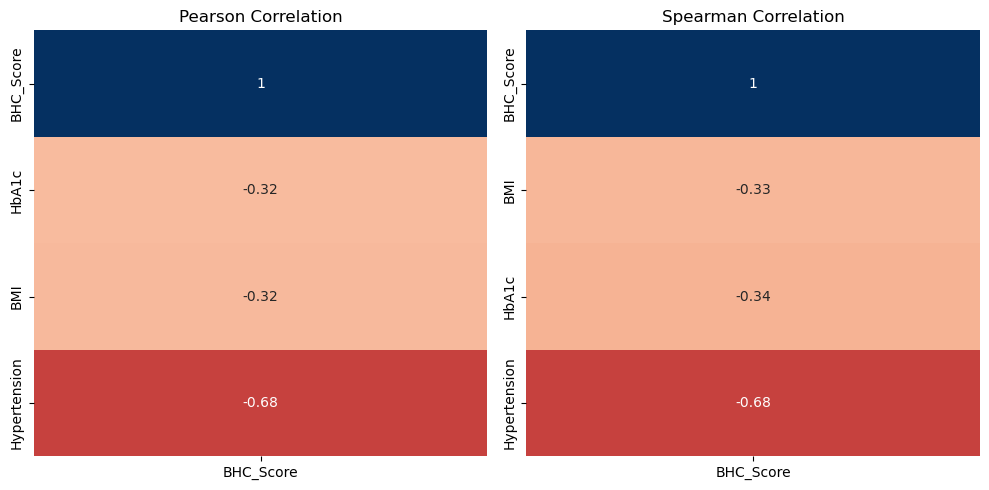

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("---  STEP 1: CORRELATION ANALYSIS (VALIDITY CHECK) ---")

variables = ['BHC_Score', 'BMI', 'HbA1c', 'Hypertension']
print("\n Pearson Correlation (Linear Relationship):")
pearson_corr = df_final_valid[variables].corr(method='pearson')
display(pearson_corr[['BHC_Score']].sort_values(by='BHC_Score', ascending=False))

print("\n Spearman Correlation (Rank Relationship):")
spearman_corr = df_final_valid[variables].corr(method='spearman')
display(spearman_corr[['BHC_Score']].sort_values(by='BHC_Score', ascending=False))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr[['BHC_Score']].sort_values(by='BHC_Score', ascending=False), 
            annot=True, cmap='RdBu', vmin=-1, vmax=1, cbar=False)
plt.title("Pearson Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr[['BHC_Score']].sort_values(by='BHC_Score', ascending=False), 
            annot=True, cmap='RdBu', vmin=-1, vmax=1, cbar=False)
plt.title("Spearman Correlation")

plt.tight_layout()
plt.show()

In [25]:
import statsmodels.api as sm
import numpy as np

print("---  STEP 2: REGRESSION (FIXED) ---")

df_reg = df_final_valid[['BHC_Score', 'Hypertension']].dropna()

df_reg = df_reg[df_reg['Hypertension'].isin([0, 1])]

print(f"   -> Analyzing {len(df_reg)} participants (Cleaned for Regression)")

X = df_reg['BHC_Score']
y = df_reg['Hypertension']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

print("\n ODDS RATIO (The 'Risk Factor'):")
print(np.exp(logit_model.params))

---  STEP 2: REGRESSION (FIXED) ---
   -> Analyzing 6053 participants (Cleaned for Regression)
Optimization terminated successfully.
         Current function value: 0.365462
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                 6053
Model:                          Logit   Df Residuals:                     6051
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Feb 2026   Pseudo R-squ.:                  0.4502
Time:                        10:44:18   Log-Likelihood:                -2212.1
converged:                       True   LL-Null:                       -4023.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        

---  STEP 3: SUBGROUP ANALYSIS ---

 Average BHC Score by GENDER (1=Male, 2=Female):
Gender
1.0    58.516364
2.0    60.777494
Name: BHC_Score, dtype: float64

 Average BHC Score by AGE GROUP:
Age_Group
Young (20-39)     64.157587
Middle (40-59)    59.336093
Senior (60+)      57.189844
Name: BHC_Score, dtype: float64

 Average BHC Score by BMI CATEGORY:
BMI_Cat
Underweight    64.860089
Normal         63.722239
Overweight     60.586752
Obese          56.544517
Name: BHC_Score, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_16168\1855292959.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_final_valid.groupby('Age_Group')['BHC_Score'].mean())
C:\Users\pc\AppData\Local\Temp\ipykernel_16168\1855292959.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_final_valid.groupby('BMI_Cat')['BHC_Score'].mean())
C:\Users\pc\AppData\Local\Temp\ipykernel_16168\1855292959.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_G

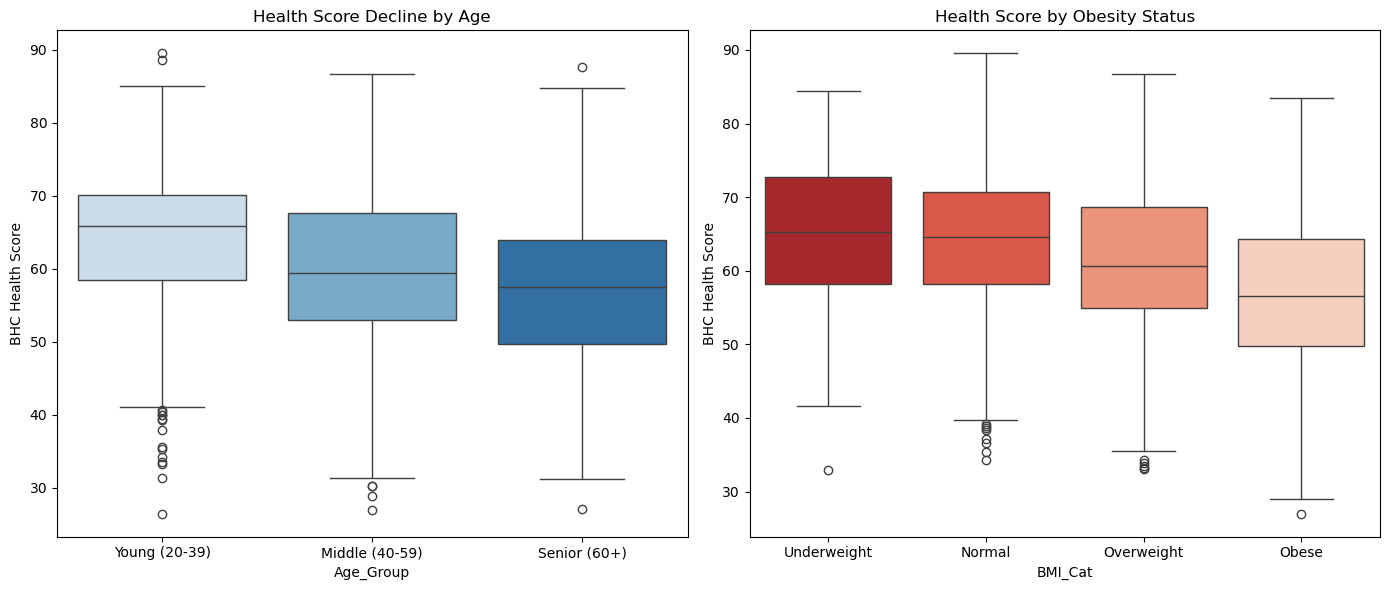

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("---  STEP 3: SUBGROUP ANALYSIS ---")

df_final_valid['Age_Group'] = pd.cut(df_final_valid['Age'], 
                                     bins=[20, 40, 60, 100], 
                                     labels=['Young (20-39)', 'Middle (40-59)', 'Senior (60+)'])

df_final_valid['BMI_Cat'] = pd.cut(df_final_valid['BMI'], 
                                   bins=[0, 18.5, 25, 30, 100], 
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

print("\n Average BHC Score by GENDER (1=Male, 2=Female):")
print(df_final_valid.groupby('Gender')['BHC_Score'].mean())

print("\n Average BHC Score by AGE GROUP:")
print(df_final_valid.groupby('Age_Group')['BHC_Score'].mean())

print("\n Average BHC Score by BMI CATEGORY:")
print(df_final_valid.groupby('BMI_Cat')['BHC_Score'].mean())

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Age_Group', y='BHC_Score', data=df_final_valid, ax=ax[0], palette="Blues")
ax[0].set_title("Health Score Decline by Age")
ax[0].set_ylabel("BHC Health Score")

sns.boxplot(x='BMI_Cat', y='BHC_Score', data=df_final_valid, ax=ax[1], palette="Reds_r")
ax[1].set_title("Health Score by Obesity Status")
ax[1].set_ylabel("BHC Health Score")

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

print("---  CREATING EXCEL REPORT ---")

output_excel = "BHC_Project_1.xlsx"
save_path = os.path.join(base_path, output_excel)


summary_table = df_final_valid.groupby('Gender')[['Age', 'BHC_Score', 'BMI', 'Hypertension']].mean()
summary_table.index = ['Male', 'Female'] 


with pd.ExcelWriter(save_path, engine='openpyxl') as writer:
    summary_table.to_excel(writer, sheet_name='Summary_Stats')
    
    df_final_valid.to_excel(writer, sheet_name='All_Patients', index=False)

print(f" SUCCESS! Created: {output_excel}")
print(f" Location: {base_path}")


---  CREATING EXCEL REPORT ---
 SUCCESS! Created: BHC_Project_1.xlsx
 Location: C:\Users\pc\Documents\bhc project
